## Neuronal Network

### **Name:** Ramiro Alberto Rios Pérez  **I - SOFT - 8

#### Import libraries

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargar el archivo csv

In [2]:
df = pd.read_csv('iris.csv')

#### Mostrar las primeras filas del conjunto de datos

In [3]:
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### Revisamos los valores nulos

In [4]:
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#### Información general del dataset

In [5]:
print("\nInformación general del dataset:")
print(df.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


#### Estadísticas descriptivas

In [6]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### Visualizamos la distribución de clases

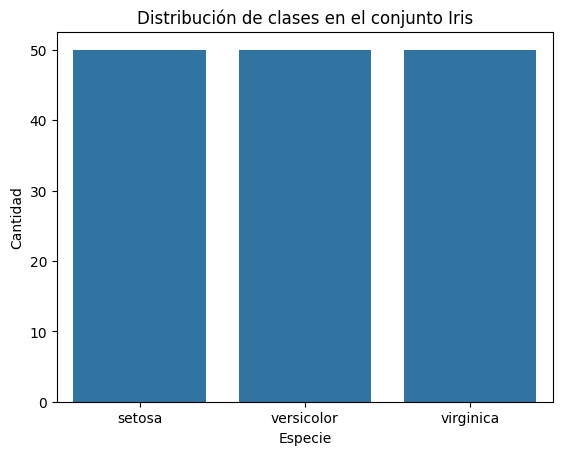

In [7]:
sns.countplot(x='species', data=df)
plt.title('Distribución de clases en el conjunto Iris')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()

### Normalizar los datos y codificar las etiquetas

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


Separar las caracteristicas (X) y la variable objetivo (y)

In [9]:
X = df.drop('species', axis=1)  # Todas las columnas excepto 'species'
y = df['species']               # Solo la columna 'species'

Normalizamos las características numéricas

In [10]:
escalador = StandardScaler()
X_normalizado = escalador.fit_transform(X)

Codificamos las etiquetas (de texto a números)

In [11]:
codificador = LabelEncoder()
y_codificado = codificador.fit_transform(y)

Mostrar cómo quedaron las etiquetas codificadas

In [12]:
print("Etiquetas originales:", y.unique())
print("Etiquetas codificadas:", np.unique(y_codificado))

Etiquetas originales: ['setosa' 'versicolor' 'virginica']
Etiquetas codificadas: [0 1 2]


Este paso deja las características en la misma escala (media 0, desviación estándar 1) y transforma las clases tipo texto (setosa, versicolor, virginica) a números (0, 1, 2).

### División del conjutno de datos

Vamos a dividir el conjunto en entrenamiento (train) y prueba (test), usando un 80% para entrenar y 20% para probar.

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_normalizado, y_codificado, test_size=0.2, random_state=42, stratify=y_codificado)

In [15]:
# Mostramos la forma de cada conjunto
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


### Construcción de la red neuronal

Aquí definimos una red neuronal alimentada hacia adelante (feedforward) con una capa oculta y función de activación ReLU. La salida tendrá 3 neuronas (una por clase) con activación softmax.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [17]:
# Convertimos las etiquetas a one-hot encoding (necesario para softmax)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [18]:
# Definimos el modelo secuencial
modelo = Sequential()

In [19]:
# Capa de entrada + una capa oculta con 10 neuronas y activación ReLU
modelo.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Capa de salida con 3 neuronas (una por clase) y activación softmax
modelo.add(Dense(3, activation='softmax'))

In [21]:
# Compilamos el modelo
modelo.compile(
    optimizer='adam',                 # Optimizador Adam
    loss='categorical_crossentropy', # Usamos entropía cruzada para clasificación multiclase
    metrics=['accuracy']            # Métrica de precisión
)

In [22]:
# Mostramos la estructura del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

Entrenamos la red usando los datos de entrenamiento y evaluamos el rendimiento en validación con los datos de prueba.

In [23]:
# Entrenamos el modelo
historial = modelo.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat), # Validación con conjunto de prueba
    epochs=100,                           # Número de épocas (puedes ajustar)
    batch_size=8,                         # Tamaño del lote
    verbose=1                             # Muestra información del proceso
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4837 - loss: 1.0517 - val_accuracy: 0.4667 - val_loss: 1.0942
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4906 - loss: 1.0227 - val_accuracy: 0.4667 - val_loss: 1.0316
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6207 - loss: 0.9053 - val_accuracy: 0.4667 - val_loss: 0.9782
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4847 - loss: 1.0088 - val_accuracy: 0.5333 - val_loss: 0.9287
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6432 - loss: 0.7845 - val_accuracy: 0.5667 - val_loss: 0.8879
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5681 - loss: 0.8158 - val_accuracy: 0.6000 - val_loss: 0.8500
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5950 - loss: 0.7991 - val_accuracy: 0.6333 - val_loss: 0.8155
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6325 - loss: 0.7755 - val_accuracy: 0.6

#### Visualización de la pérdida y precisión

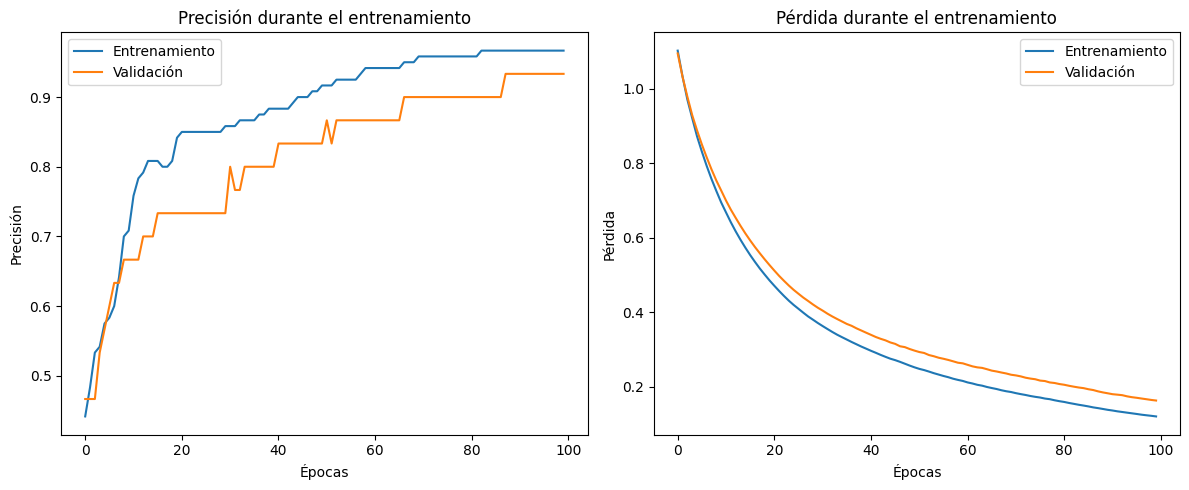

In [24]:
# Graficamos la precisión del entrenamiento y validación
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluación y visualización de resultados

In [25]:
# Evaluamos el modelo con los datos de prueba
loss, accuracy = modelo.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nPrecisión del modelo en el conjunto de prueba: {accuracy:.4f}")


Precisión del modelo en el conjunto de prueba: 0.9333


Matriz de confusión:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


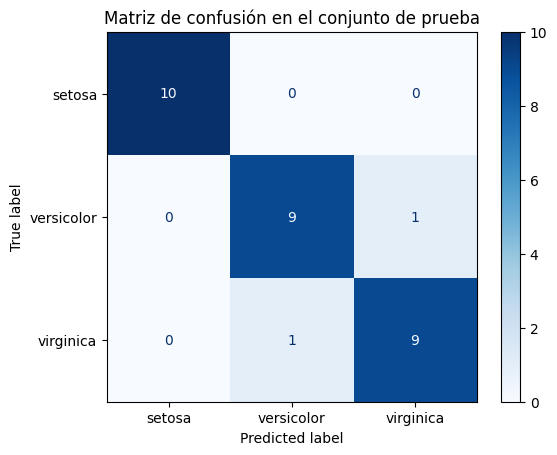

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecimos clases para el conjunto de prueba
y_pred_probs = modelo.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Obtenemos las clases predichas
y_true = np.argmax(y_test_cat, axis=1)    # Clases reales

# Generamos la matriz de confusión
matriz = confusion_matrix(y_true, y_pred)

# Mostramos la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,
                              display_labels=codificador.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión en el conjunto de prueba")
plt.show()

## Conclusión

En este proyecto se implementó una red neuronal feedforward para clasificar flores del conjunto de datos Iris, uno de los clásicos en el aprendizaje automático. A lo largo del desarrollo:

- Se normalizaron las características para mejorar la eficiencia del entrenamiento.
- Se codificaron las etiquetas de texto a valores numéricos.
- Se construyó una red neuronal con una capa oculta y se entrenó durante 100 épocas.
- Se utilizó entropía cruzada como función de pérdida y el optimizador Adam.

Los resultados muestran una alta precisión en el conjunto de prueba, lo que indica que el modelo aprendió correctamente a distinguir entre las tres especies de flores. La matriz de confusión confirmó que las predicciones son bastante exactas.

Este ejercicio demuestra cómo las redes neuronales pueden aplicarse con éxito a problemas de clasificación multiclase simples, y sienta las bases para abordar tareas más complejas en el futuro.